# 1.导入文本分析相关的 Python 库

In [1]:
import pandas as pd
import jieba.analyse as analyse
import jieba
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
# 读取数据
df = pd.read_excel("Spiderman.xlsx")

In [3]:
# 查看数据列名
df.columns

Index(['COMMENT_ID', 'USER_MD5', 'MOVIE_ID', 'CONTENT', 'VOTES',
       'COMMENT_TIME', 'RATING'],
      dtype='object')

In [4]:
df.head()

,COMMENT_ID,USER_MD5,MOVIE_ID,CONTENT,VOTES,COMMENT_TIME,RATING
0,1.598341e+08,d30e941fd7f60ee3856786d387906667,1306612.0,很喜欢这个不帅，带点腼腆，很勇敢很痴情的蜘蛛侠：）,676.0,2009-09-17 21:51:00,NaN
1,1.642479e+07,a984c29fc0431a084e46bb520f61851c,1306612.0,不同以往的英雄设计，“平民英雄”看来更能打动人心，其中蜘蛛侠倒挂亲吻女主角的镜头相信是很多女...,588.0,2007-06-30 22:25:00,4.0
2,1.165145e+09,61bf8d207f1509c673f0610feaea26cb,1306612.0,我需要被猴子咬一口，然后变成孙悟空！！,419.0,2017-03-15 20:00:00,4.0
3,5.138858e+08,fa217ecb1ab3e38483362477ec156b26,1306612.0,第一级还是很好看的！屌丝梦,237.0,2012-03-29 12:52:00,5.0
4,2.217906e+07,ec0f8d2a7679baea47e3555e62335957,1306612.0,喜欢James Franco演Harry。,374.0,2007-10-18 11:57:00,3.0


In [5]:
# 统计四部电影各自的评论数据量
df2 = df.MOVIE_ID.value_counts()

In [6]:
df2

1306612.0     220
6082518.0     159
24753477.0    100
1418189.0     100
Name: MOVIE_ID, dtype: int64

四部电影分别是：1306612.0, 6082518.0, 24753477.0, 1418189.0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   COMMENT_ID    579 non-null    float64       
 1   USER_MD5      579 non-null    object        
 2   MOVIE_ID      579 non-null    float64       
 3   CONTENT       579 non-null    object        
 4   VOTES         579 non-null    float64       
 5   COMMENT_TIME  579 non-null    datetime64[ns]
 6   RATING        563 non-null    float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 32.0+ KB


In [8]:
# 数据格式有 582 行数据 和 7 列数据
df.shape

(582, 7)

# TF-IDF找出高频词 

+ TF-IDF（term frequency–inverse document frequency，词频-逆向文件频率）是一种用于信息检索（information retrieval）与文本挖掘（text mining）的常用加权技术。

+ TF-IDF是一种统计方法，用以评估一字词对于一个文件集或一个语料库中的其中一份文件的重要程度。字词的重要性随着它在文件中出现的次数成正比增加，但同时会随着它在语料库中出现的频率成反比下降。

+ TF-IDF的主要思想是：如果某个单词在一篇文章中出现的频率TF高，并且在其他文章中很少出现，则认为此词或者短语具有很好的类别区分能力，适合用来分类。

In [9]:
df_1306612 = df[df['MOVIE_ID'] == 1306612.0]

df_6082518 = df[df['MOVIE_ID'] == 6082518.0]

df_24753477 = df[df['MOVIE_ID'] == 24753477.0]

df_1418189 = df[df['MOVIE_ID'] == 1418189.0]

## 第一部电影分析 

In [10]:
import re

class Tokenizer():
    def __init__(self):
        self.n = 0
        
    def __call__(self,line):
        tokens = []
        reg = "[^0-9A-Za-z\u4e00-\u9fa5]"
        # N-gram
        line = line.replace(' ', '')
        line = re.sub(reg, ',', line)
        words = [word for word in jieba.cut(line)]
        
        for gram in [1,2]:
            for i in range(len(line)-gram + 1):
                tokens += ["".join(words[i:i+gram])]
        return words

In [11]:
content = df_1306612['CONTENT']
result_list = []
for i in range(len(content)):
    result_list.append(str(content[i]).strip())
print(len(result_list))

220


In [25]:
# TF-IDF 分析，找出高频词
tfidf = TfidfVectorizer(tokenizer=Tokenizer(), min_df=3, max_df=0.95, sublinear_tf=True)

X = tfidf.fit_transform(result_list)

# 对词频进行降序排序
sorted_result_list = sorted(tfidf.vocabulary_.items(),reverse=True)

# 保存高频词
movie_content = open('1306612-电影评论tf-idf词频统计.txt','a+',encoding='utf-8')
index = 0
for item in sorted_result_list:
    a,b = item
    if len(a) < 2:
        continue
    else:
        movie_content.write(str(a)+'\t'+str(b)+'\n')
        print(a)
        index += 1
        
movie_content.close()
print('一共写入%d条数据'%index)

飞跃
题材
非常
青涩
需要
雷米
雨中
难看
除了
镜头
重温
那时
那句
那会
那么
那个
迷人
这部
这类
这样
这是
这么
这个
还有
还是
身份
越重
越大
超能力
超级
超凡
超人
起来
走向
责任
诞生
设计
许多
记得
讨厌
詹姆斯
角色
觉得
观众
蝙蝠侠
蜘蛛侠
蜘蛛丝
蜘蛛
虽然
英雄主义
英雄
节奏
自己
腼腆
能够
能力
而且
美国
绿魔
经典
系列
精彩
算是
简单
第一集
第一部
第一次
票房
知道
真的
真是
看过
看起来
看着
看来
看到
看似
男孩
男女
男主角
男主
电影院
电影
甚至
现在
玛丽
特效
特技
特别
片子
父亲
然后
漫画
漫威
演员
漂亮
深刻
没有
永远
气质
比较
果然
来说
来看
本身
有趣
有点
最后
时候
无聊
方面
斯特
故事情节
故事
改编
接吻
技术
托比
打动
所以
或者
我们
成长
成为
感觉
情节
恶魔
怎么
很多
彼得
影片
当时
当年
强大
弗兰科
开始
应该
幼稚
年代
平民
平凡
希望
山姆
屌丝
居然
就是
尤其
小时候
导演
容易
实在
完美
完全
学校
如此
如果
好莱坞
好看
女朋友
女主角
女主
奎尔
大片
大楼
塑造
基本
城市
地方
因为
喜欢
商业
唯一
咬一口
吐丝
各种
台词
可爱
可是
可以
只能
只是
变成
叔叔
反派
友情
即使
印象
十年
加上
力量
剧情
出来
其实
其他
其中
兰兰
倒挂
但是
以前
以为
今天
什么
人物
亲吻
二代
也许
之后
之前
主角
为什么
为了
个人
世纪
世界
不错
不过
不能
不是
不如
不够
不会
三部曲
一部
一般
一种
一直
一点
一样
一个
一下
withgreatpowercomesgreatresponsibility
spiderman
spider
peter
mj
man
harry
dunst
2002
10
一共写入240条数据


## 第二部电影

In [33]:
df_6082518

,COMMENT_ID,USER_MD5,MOVIE_ID,CONTENT,VOTES,COMMENT_TIME,RATING
423,1.876775e+09,9042ce438ab136e6c19bbea0aaa09634,6082518.0,分成7天看完的！我为加菲尔德爆灯！！！这版的蜘蛛侠不仅人帅，还会撩妹！妙啊！石头姐也是贼好看...,0.0,2019-09-06 19:55:00,NaN
424,1.941100e+09,4515c28db8cc268a5ce44b9c7149e257,6082518.0,这一版简直帅呆，大战电光人和小绿魔，虽然说还以为会一起大战邪恶六人组，最后只是惊鸿一瞥，但是...,0.0,2019-09-06 00:52:00,5.0
425,1.941011e+09,123a944182b0447a089f7b33d5139423,6082518.0,成长痛苦，一个小男孩长大了的故事,0.0,2019-09-05 23:42:00,4.0
426,1.940900e+09,aa1920e5df11a4663bfb9ced6a4edf6c,6082518.0,不得不说格温头发被风吹起来那一瞬间惊艳到我了\n却不成想格温离蜘蛛侠而去了\n所以到底谁是蜘...,0.0,2019-09-05 22:28:00,4.0
427,1.940548e+09,baddc2f1956a35707e8f50eaca0a0eb6,6082518.0,这一版的蜘蛛侠有点过于悲情了吧，心疼小蜘蛛！,0.0,2019-09-05 16:46:00,4.0
...,...,...,...,...,...,...,...
577,8.015229e+08,0244374a2bf529f8016a510cb6592599,6082518.0,称职脑残粉，坐头三排正中间看荡秋千就心满意足了。,4.0,2014-04-29 18:59:00,5.0
578,7.850765e+08,6c53ddd1a6cbe3487375436d3b02b0a6,6082518.0,脑残粉一枚。闪光仔很帅。小绿魔帅得我掉了一地口水，唇红齿白美少年。等第三部。,8.0,2014-05-05 21:26:00,5.0
579,8.031831e+08,105f6c53307d3193260ec7e13d6ca2bc,6082518.0,全面的少年向了，我这个不是少年的人实在喜欢不起来，倒是stone小姐风采依旧，可喜,1.0,2014-05-05 05:10:00,3.0
580,8.034333e+08,d07aa2e38a36656f4ea5694b125e7d3a,6082518.0,个人觉得还不错，大桥上的“I love you”、杰米·福克斯那场关键的“遇险”戏、时代广场...,3.0,2014-05-05 22:47:00,4.0


In [36]:
 df_6082518['CONTENT'] =  df_6082518['CONTENT'].astype(str)

/Users/baoyu/Software/anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [43]:
content = df_6082518['CONTENT'].tolist()

In [44]:
content

['分成7天看完的！我为加菲尔德爆灯！！！这版的蜘蛛侠不仅人帅，还会撩妹！妙啊！石头姐也是贼好看！而且打电人真的太牛逼了，完爆另外两版好伐！但是女主死了真是太令人难过了，想扣一分。另外，这版的Harry也很可爱！！！',
 '这一版简直帅呆，大战电光人和小绿魔，虽然说还以为会一起大战邪恶六人组，最后只是惊鸿一瞥，但是已经足够精彩了。和电光人打斗，时代广场和电厂，特效都炸裂。但是最受不了，格温竟然领便当！太惨了吧！不过怎么说呢，到了最后蜘蛛侠再次站出来，突然就醒悟到，这真的是，能力越大，责任越大。无论经历了多么悲伤的事情，他还是那个，保护人民的蜘蛛侠，沉重又令人心疼。',
 '成长痛苦，一个小男孩长大了的故事',
 '不得不说格温头发被风吹起来那一瞬间惊艳到我了\n却不成想格温离蜘蛛侠而去了\n所以到底谁是蜘蛛侠女朋友',
 '这一版的蜘蛛侠有点过于悲情了吧，心疼小蜘蛛！',
 '有点蝙蝠侠黑暗骑士的影子。从此以后再也没有好看的蜘蛛侠系列电影。',
 '最后格温死的时候冲击真的太大了。结果什么也不记得了。',
 '完全重蹈了蜘蛛侠3的覆辙',
 '小绿魔的扮演者德恩真的是太美貌了，总是被主角之外的人吸引。',
 '我真的是意！难！平！明明差一点就能抓住格温了！！',
 '审美疲劳的，不记得是不是在影院看的',
 '特效什么的都还行，反派是个充电宝，没想到女主掉下去之后居然……哎',
 '一如既往的正能量满格。能力越大，责任越大，为了世界为了他人而发挥自己的能力，我们老板可能是蜘蛛侠的粉。女主居然会死，不过不死的话确实显得有点碍事了。',
 '格温死的那个镜头很悲伤，但也很美',
 '外面黑云压顶，我们窝在家里?',
 '我竟然没看过。。',
 '比第一集精彩，特效好看，加上配乐真的cool,磕死这对cp了，结果真死了。',
 '电光人好酷。',
 '蜘蛛侠最好的一部，爱石头姐',
 '屌丝男逆袭',
 '继续延续蜘蛛侠系列的特色，所有反派都和小蜘蛛有前缘',
 '哎，成龙喜剧风格电影',
 '加菲满分',
 '特效好看！电光火石的超带感！女主是少见的智勇双全，结果挂了，唯一遗憾。果然我第一次看超凡就爱上了加菲。',
 '蜘蛛侠',
 '加菲果然还是最有型的(?ˉ??ˉ??)',
 '真是一部现在看上去令人惋惜的爱情电影',
 '总感觉这个系列的整体构思都严重受到诺兰版

In [45]:
print(len(content))

159


In [46]:
# TF-IDF 分析，找出高频词
tfidf = TfidfVectorizer(tokenizer=Tokenizer(), min_df=3, max_df=0.95, sublinear_tf=True)

X = tfidf.fit_transform(content)

# 对词频进行降序排序
sorted_result_list = sorted(tfidf.vocabulary_.items(),reverse=True)

# 保存高频词
movie_content = open('6082518-电影评论tf-idf词频统计.txt','a+',encoding='utf-8')
index = 0
for item in sorted_result_list:
    a,b = item
    if len(a) < 2:
        continue
    else:
        movie_content.write(str(a)+'\t'+str(b)+'\n')
        print(a)
        index += 1
        
movie_content.close()
print('一共写入%d条数据'%index)

黑暗
非常
青春
需要
难以
配乐
部分
那么
那个
遗憾
这部
这种
这样
这么
这个
还行
还有
还是
路线
越来越
超级
超凡
起来
记得
角色
觉得
蝙蝠侠
蜘蛛侠
蜘蛛
虽然
英雄
节奏
自己
美队
美国
绿魔
继续
结果
结局
结尾
纽约
系列
精彩
简直
第二部
第三部
第一部
竟然
突然
确实
石头
真的
真是
看着
看到
男女
电影
电光
现在
犀牛
特效
片子
爱情
然后
炒饭
火石
漫威
涵涵
泪点
注定
没有
永远
比如
格温
有点
最后
曼哈顿
显得
是不是
时候
故事
接受
拯救
抓住
打斗
所以
我们
感觉
感情
感动
情节
悲剧
悲伤
心疼
很多
彼得
影院
影片
彩蛋
弄死
广告
已经
居然
就是
小绿魔
小绿
小男孩
小孩
导演
实在
完全
好看
女朋友
女主角
女主死
女主
失去
太惨
大战
塑造
场面
喜欢
唯一
哈利
各种
可惜
可以
另外
叙事
变成
发展
反派
又臭又长
博士
动作
加菲
剧本
剧情
出来
再次
再也
内容
其他
六人组
全程
充电
你们
但是
以后
以为
令人
他们
什么
人物
之后
主角
为啥
中间
两个
世界
不错
不过
不要
不能
不是
不会
下去
一部
一起
一直
一点
一定
一句
一个
danedehaan
dane
cp
3d
一共写入178条数据


## 第三部电影 

In [47]:
# TF-IDF 分析，找出高频词
tfidf = TfidfVectorizer(tokenizer=Tokenizer(), min_df=3, max_df=0.95, sublinear_tf=True)

X = tfidf.fit_transform(df_24753477["CONTENT"].tolist())

# 对词频进行降序排序
sorted_result_list = sorted(tfidf.vocabulary_.items(),reverse=True)

# 保存高频词
movie_content = open('24753477-电影评论tf-idf词频统计.txt','a+',encoding='utf-8')
index = 0
for item in sorted_result_list:
    a,b = item
    if len(a) < 2:
        continue
    else:
        movie_content.write(str(a)+'\t'+str(b)+'\n')
        print(a)
        index += 1
        
movie_content.close()
print('一共写入%d条数据'%index)

青春
钢铁
适合
这部
这个
还有
还是
超级
角色
蜘蛛侠
蜘蛛
荷兰
英雄
自己
科技
确实
知道
真的
真是
看过
看到
电影
片子
漫威
没有
比较
来说
时候
成长
感觉
就是
完全
宇宙
喜欢
可爱
可以
反派
剧情
出来
儿子
什么
不错
不是
三星
一部
一样
一个
一共写入47条数据


## 第四部电影

In [48]:
# TF-IDF 分析，找出高频词
tfidf = TfidfVectorizer(tokenizer=Tokenizer(), min_df=3, max_df=0.95, sublinear_tf=True)

X = tfidf.fit_transform(df_1418189["CONTENT"].tolist())

# 对词频进行降序排序
sorted_result_list = sorted(tfidf.vocabulary_.items(),reverse=True)

# 保存高频词
movie_content = open('1418189-电影评论tf-idf词频统计.txt','a+',encoding='utf-8')
index = 0
for item in sorted_result_list:
    a,b = item
    if len(a) < 2:
        continue
    else:
        movie_content.write(str(a)+'\t'+str(b)+'\n')
        print(a)
        index += 1
        
movie_content.close()
print('一共写入%d条数据'%index)

黑色
黑化
问题
迷失
这部
这么
这个
还是
觉得
蜘蛛侠
蜘蛛
虽然
英雄
自己
绿魔
第一次
知道
电影
没有
没什么
沙人
永远
毒液
有点
有些
最好
最后
时候
敌人
托比
感觉
很大
就是
小绿
好看
好像
女主
喜欢
哈利
可以
反派
剧情
其实
作为
但是
两部
不过
三部曲
三部
一部
一段
mj
一共写入52条数据


# python wordcloud画词云图

In [50]:
import jieba
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from imageio import imread

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df_1306612 = df[df['MOVIE_ID'] == 1306612.0]

df_6082518 = df[df['MOVIE_ID'] == 6082518.0]

df_24753477 = df[df['MOVIE_ID'] == 24753477.0]

df_1418189 = df[df['MOVIE_ID'] == 1418189.0]

(-0.5, 599.5, 299.5, -0.5)

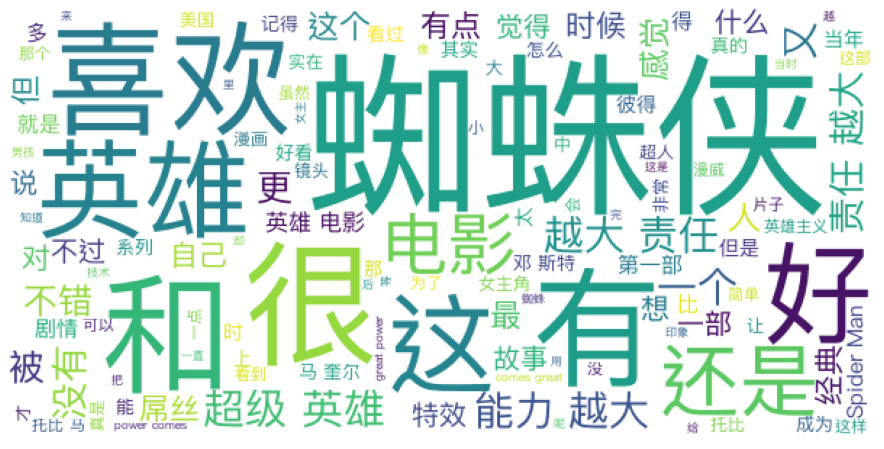

In [51]:
txt = [str(j) for j in df_1306612["CONTENT"].tolist()]
txt = "".join(txt)

txt = txt.replace('\n',"").replace("\u3000","")
word_list = jieba.cut(txt)
result = " ".join(word_list) #分词用空格隔

# 导入停词
# 用于去掉文本中类似于'啊'、'你'，'我'之类的词
stop_words = open("stop_words_zh.txt",encoding="utf8").read().split("\n")

# 使用WordCloud生成词云
word_cloud = WordCloud(
#         font_path="C:/Windows/Fonts/simfang.ttf",  # Windows设置词云字体
    font_path=r"/System/Library/Fonts/PingFang.ttc", # MacBook设置词云字体
    background_color="white", # 词云图的背景颜色
    width=600,
    height=300, 
    max_words=500,
    stopwords=stop_words,  # 去掉的停词
    min_font_size=8).generate(result)

image=word_cloud.to_image()
image.show()

# 运用matplotlib展现结果
plt.subplots(figsize=(16, 8))
plt.imshow(word_cloud)
plt.axis("off")

(-0.5, 599.5, 299.5, -0.5)

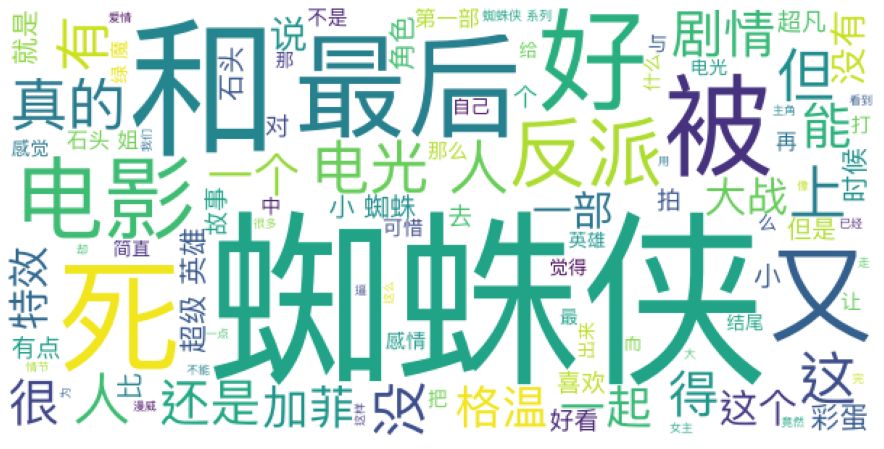

In [52]:
txt = [str(j) for j in df_6082518["CONTENT"].tolist()]
txt = "".join(txt)

txt = txt.replace('\n',"").replace("\u3000","")
word_list = jieba.cut(txt)
result = " ".join(word_list) #分词用空格隔

# 导入停词
# 用于去掉文本中类似于'啊'、'你'，'我'之类的词
stop_words = open("stop_words_zh.txt",encoding="utf8").read().split("\n")

# 使用WordCloud生成词云
word_cloud = WordCloud(
#         font_path="C:/Windows/Fonts/simfang.ttf",  # Windows设置词云字体
    font_path=r"/System/Library/Fonts/PingFang.ttc", # MacBook设置词云字体
    background_color="white", # 词云图的背景颜色
    width=600,
    height=300, 
    max_words=500,
    stopwords=stop_words,  # 去掉的停词
    min_font_size=8).generate(result)

image=word_cloud.to_image()
image.show()

# 运用matplotlib展现结果
plt.subplots(figsize=(16, 8))
plt.imshow(word_cloud)
plt.axis("off")

(-0.5, 599.5, 299.5, -0.5)

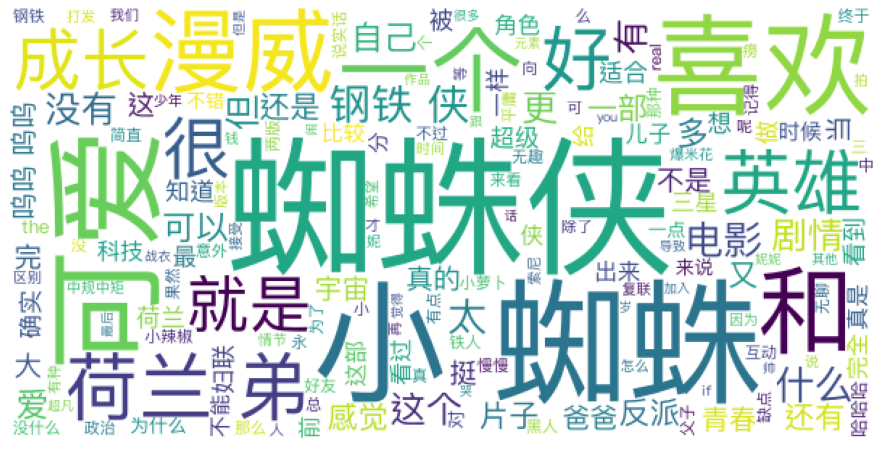

In [53]:
txt = [str(j) for j in df_24753477["CONTENT"].tolist()]
txt = "".join(txt)

txt = txt.replace('\n',"").replace("\u3000","")
word_list = jieba.cut(txt)
result = " ".join(word_list) #分词用空格隔

# 导入停词
# 用于去掉文本中类似于'啊'、'你'，'我'之类的词
stop_words = open("stop_words_zh.txt",encoding="utf8").read().split("\n")

# 使用WordCloud生成词云
word_cloud = WordCloud(
#         font_path="C:/Windows/Fonts/simfang.ttf",  # Windows设置词云字体
    font_path=r"/System/Library/Fonts/PingFang.ttc", # MacBook设置词云字体
    background_color="white", # 词云图的背景颜色
    width=600,
    height=300, 
    max_words=500,
    stopwords=stop_words,  # 去掉的停词
    min_font_size=8).generate(result)

image=word_cloud.to_image()
image.show()

# 运用matplotlib展现结果
plt.subplots(figsize=(16, 8))
plt.imshow(word_cloud)
plt.axis("off")

(-0.5, 599.5, 299.5, -0.5)

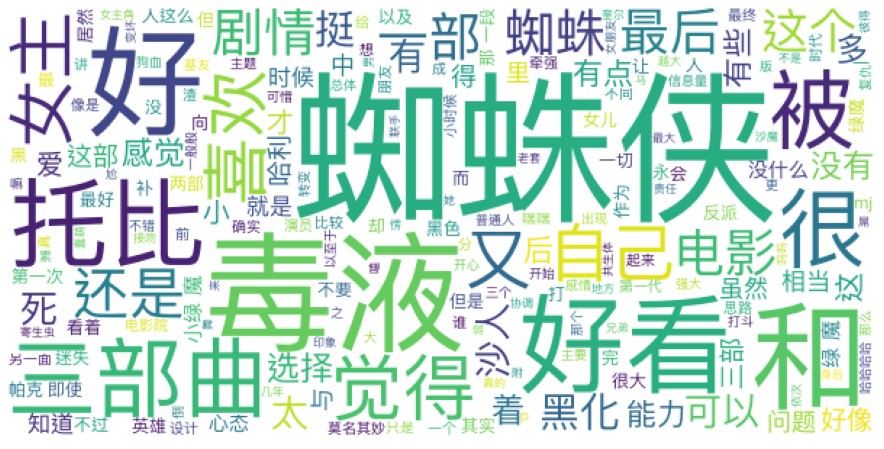

In [54]:
txt = [str(j) for j in df_1418189["CONTENT"].tolist()]
txt = "".join(txt)

txt = txt.replace('\n',"").replace("\u3000","")
word_list = jieba.cut(txt)
result = " ".join(word_list) #分词用空格隔

# 导入停词
# 用于去掉文本中类似于'啊'、'你'，'我'之类的词
stop_words = open("stop_words_zh.txt",encoding="utf8").read().split("\n")

# 使用WordCloud生成词云
word_cloud = WordCloud(
#         font_path="C:/Windows/Fonts/simfang.ttf",  # Windows设置词云字体
    font_path=r"/System/Library/Fonts/PingFang.ttc", # MacBook设置词云字体
    background_color="white", # 词云图的背景颜色
    width=600,
    height=300, 
    max_words=500,
    stopwords=stop_words,  # 去掉的停词
    min_font_size=8).generate(result)

image=word_cloud.to_image()
image.show()

# 运用matplotlib展现结果
plt.subplots(figsize=(16, 8))
plt.imshow(word_cloud)
plt.axis("off")

# 情感分析

SnowNLP是一个python写的类库，可以方便的处理中文文本内容，是受到了TextBlob的启发而写的，由于现在大部分的自然语言处理库基本都是针对英文的，于是写了一个方便处理中文的类库，并且和TextBlob不同的是，这里没有用NLTK，所有的算法都是自己实现的，并且自带了一些训练好的字典。注意本程序都是处理的unicode编码，所以使用时请自行decode成unicode。

情感分类的基本模型是贝叶斯模型Bayes，对于有两个类别的分类问题来说，其特征之间是相互独立的，属于类别的贝叶斯模型。

In [35]:
from snownlp import SnowNLP

# 调用SnowNLP对数据进行分析
def get_sentiment_cn(text):
    s = SnowNLP(text)
    return s.sentiments

# 情感标签的划分
def sentiment_label(x):
    if x > 0.6:
        return "积极"
    elif 0.4 <= x <=0.6:
        return "中性"
    elif x < 0.4:
        return "消极"

In [36]:
df["CONTENT-情感值"] = df["CONTENT"].apply(lambda x: get_sentiment_cn(str(x)))
df["CONTENT-情感标签"] = df["CONTENT-情感值"].apply(lambda x: sentiment_label(float(x)))

In [37]:
df.head()

,COMMENT_ID,USER_MD5,MOVIE_ID,CONTENT,VOTES,COMMENT_TIME,RATING,CONTENT-情感值,CONTENT-情感标签
0,1.598341e+08,d30e941fd7f60ee3856786d387906667,1306612.0,很喜欢这个不帅，带点腼腆，很勇敢很痴情的蜘蛛侠：）,676.0,2009-09-17 21:51:00,NaN,0.999380,积极
1,1.642479e+07,a984c29fc0431a084e46bb520f61851c,1306612.0,不同以往的英雄设计，“平民英雄”看来更能打动人心，其中蜘蛛侠倒挂亲吻女主角的镜头相信是很多女...,588.0,2007-06-30 22:25:00,4.0,1.000000,积极
2,1.165145e+09,61bf8d207f1509c673f0610feaea26cb,1306612.0,我需要被猴子咬一口，然后变成孙悟空！！,419.0,2017-03-15 20:00:00,4.0,0.171610,消极
3,5.138858e+08,fa217ecb1ab3e38483362477ec156b26,1306612.0,第一级还是很好看的！屌丝梦,237.0,2012-03-29 12:52:00,5.0,0.964632,积极
4,2.217906e+07,ec0f8d2a7679baea47e3555e62335957,1306612.0,喜欢James Franco演Harry。,374.0,2007-10-18 11:57:00,3.0,0.696371,积极


In [38]:
df.to_excel("保存情感分析的结果.xlsx", index=False)

# LDA主题模型分析

In [14]:
df_1306612 = df[df['MOVIE_ID'] == 1306612.0]

df_6082518 = df[df['MOVIE_ID'] == 6082518.0]

df_24753477 = df[df['MOVIE_ID'] == 24753477.0]

df_1418189 = df[df['MOVIE_ID'] == 1418189.0]

In [15]:
df_1306612.columns

Index(['COMMENT_ID', 'USER_MD5', 'MOVIE_ID', 'CONTENT', 'VOTES',
       'COMMENT_TIME', 'RATING'],
      dtype='object')

In [12]:
import jieba
import pandas as pd
import numpy as np
from gensim.corpora import Dictionary
from gensim.models import LdaModel
import warnings
import os
import time

warnings.filterwarnings("ignore")

class Lda_model:
    '''
    基于gensim
    
    参数：
        n：主题的个数
        corpus1,dictionary1:自动传入
        passes：每个主题显示的词数量
    '''
    def __init__(self,corpus1,n,dictionary1,passes):
        self.corpus1 = corpus1
        self.n = n
        self.dictionary1 = dictionary1
        self.passes = passes

    #训练模型   
    def fit(self):
        corpus1 = self.corpus1
        n = self.n
        dictionary1 = self.dictionary1
        # lda模型训练
        lda1 = LdaModel(corpus=corpus1, id2word=dictionary1, num_topics=n,passes= self.passes)
        return lda1,corpus1
    
    
    #结果处理
    def to_result(self):
        time_start = time.time()
        print('-------------模型训练开始-------------')
        model,cropus1 = self.fit()
        print('--------------模型训练结束------------')
        time_end = time.time()
        print('totally cost',time_end - time_start)
        return model,cropus1

In [13]:
#停用词表
stopwords = [line.strip() for line in open('stop_words_zh.txt', 'r').readlines()]

## id:1306612第一部电影的主题分析

In [17]:
# 切词建立语料库
words = []
for i in range(len(df_1306612["CONTENT"])):
    cut_words = list(jieba.cut(str(df_1306612["CONTENT"][i]), cut_all = False))
    words.append([cut_word.strip() for cut_word in cut_words \
                  if cut_word not in stopwords and len(cut_word.strip()) > 1 \
                  and str(cut_word).strip() != 'nan'])

# 构建训练语料
dictionary1 = Dictionary(words)
corpus1 = [dictionary1.doc2bow(word) for word in words]

perplexitys = []

#主题的个数
model_n = list(range(2, 10))

#每个主题需要显示的词的个数
n_words = 20
perplexitys = []
for n in model_n:
    #新建文件夹存储结果数据
    try:
        os.mkdir('LDA结果/主题个数为' + str(n) + '/')
    except Exception:
        pass
    
    print('当前确定主题个数为：',n)
    clf = Lda_model(corpus1,n,dictionary1,n_words)
    model,cropus1 = clf.to_result()
    perplexitys.append(np.exp2(-model.log_perplexity(cropus1)))
    
    dfs = pd.DataFrame()
    for now_topics in model.get_document_topics(cropus1):
        column = [n[0] for n in now_topics]
        values = [n[1] for n in now_topics]
        df = pd.DataFrame([values],columns = column)
        dfs = pd.concat([dfs,df])
        
    dfs = dfs.fillna(0)
    dfs['所属主题'] = np.argmax(np.array(dfs),axis = 1)
    
    dfs.index = list(range(len(dfs)))
    data = pd.DataFrame()
    datas = pd.merge(data, dfs, left_index = True,right_index = True)
    datas.to_excel('title_主题个数为' + str(n) + '.xlsx',index = None)
    d = model.print_topics(num_words=n_words)
    
    print(d)
    print('\n')
    ds = [d_[1].split('+') for d_ in d]
    for j in range(len(ds)):
        values = [float(d_.split('*')[0].strip()) for d_ in ds[j]]
        words = [d_.split('*')[1].strip().replace('"','') for d_ in ds[j]]
        dms = pd.DataFrame()
        dms['词'] = words
        dms['权重'] = values
        dms.to_excel('LDA结果/主题个数为' + str(n) + '/' + '主题' + str(j) + '.xlsx', index = None)
        
ress = pd.DataFrame()
ress['主题数'] = model_n
ress['困惑度'] = perplexitys
ress.to_excel('困惑度情况1.xlsx',index = None)

当前确定主题个数为： 2
-------------模型训练开始-------------
--------------模型训练结束------------
totally cost 2.856903076171875
[(0, '0.015*"蜘蛛侠" + 0.014*"英雄" + 0.007*"越大" + 0.005*"喜欢" + 0.005*"..." + 0.005*"责任" + 0.005*"超级" + 0.005*"时候" + 0.005*"能力" + 0.004*"没有" + 0.004*"电影" + 0.004*"一个" + 0.004*"但是" + 0.004*"蜘蛛" + 0.004*"还是" + 0.004*"不错" + 0.003*"英雄主义" + 0.003*"特效" + 0.003*"感觉" + 0.003*"怎么"'), (1, '0.014*"蜘蛛侠" + 0.011*"英雄" + 0.010*"电影" + 0.009*"越大" + 0.007*"喜欢" + 0.006*"能力" + 0.006*"还是" + 0.006*"责任" + 0.005*"超级" + 0.005*"有点" + 0.005*"一个" + 0.005*"经典" + 0.005*"什么" + 0.004*"托比" + 0.004*"漫画" + 0.004*"故事" + 0.004*"彼得" + 0.004*"great" + 0.004*"不过" + 0.004*"没有"')]


当前确定主题个数为： 3
-------------模型训练开始-------------
--------------模型训练结束------------
totally cost 2.5946760177612305
[(0, '0.015*"英雄" + 0.009*"喜欢" + 0.009*"电影" + 0.009*"蜘蛛侠" + 0.006*"没有" + 0.006*"还是" + 0.006*"经典" + 0.006*"越大" + 0.005*"不错" + 0.005*"漫画" + 0.005*"好看" + 0.005*"感觉" + 0.005*"托比" + 0.005*"能力" + 0.004*"一个" + 0.004*"超级" + 0.004*"记得" + 0.004*"故

--------------模型训练结束------------
totally cost 2.1110610961914062
[(0, '0.019*"还是" + 0.012*"英雄" + 0.011*"喜欢" + 0.008*"蜘蛛侠" + 0.006*"不错" + 0.006*"漫画" + 0.006*"这个" + 0.006*"适合" + 0.006*"是因为" + 0.004*"非常" + 0.004*"电影" + 0.004*"这样" + 0.004*"自己" + 0.004*"就是" + 0.004*"什么" + 0.004*"技术" + 0.004*"记得" + 0.004*"蜘蛛人" + 0.004*"一下" + 0.004*"其他"'), (1, '0.020*"蜘蛛侠" + 0.018*"英雄" + 0.008*"托比" + 0.008*"喜欢" + 0.008*"高科技" + 0.008*"超人" + 0.008*"一点" + 0.005*"屌丝" + 0.005*"斯特" + 0.005*"感觉" + 0.005*"超级" + 0.005*"剧情" + 0.005*"美国" + 0.005*"镜头" + 0.005*"很多" + 0.005*"小时候" + 0.005*"开始" + 0.005*"钢铁" + 0.005*"平民" + 0.005*"打动"'), (2, '0.015*"蜘蛛侠" + 0.010*"什么" + 0.010*"英雄" + 0.009*"越大" + 0.008*"一个" + 0.006*"老婆" + 0.006*"彼得" + 0.006*"责任" + 0.006*"叔叔" + 0.006*"就是" + 0.005*"还是" + 0.005*"有点" + 0.005*"一直" + 0.005*"虽然" + 0.005*"一部" + 0.005*"电影" + 0.005*"自己" + 0.004*"经典" + 0.004*"成长" + 0.004*"可以"'), (3, '0.023*"英雄" + 0.018*"电影" + 0.013*"超级" + 0.013*"越大" + 0.012*"蜘蛛侠" + 0.011*"great" + 0.008*"责任" + 0.008*"喜欢" + 0.008*"一个" + 0.0

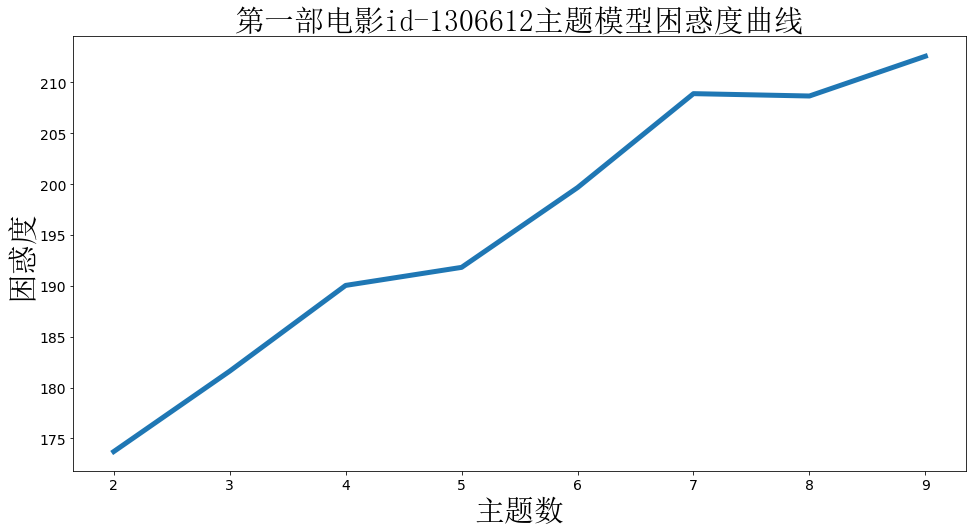

In [19]:
import matplotlib.pyplot as plt
import matplotlib as mpl

params={
    'axes.labelsize': '16',       
    'xtick.labelsize':'14',
    'ytick.labelsize':'14',
    'lines.linewidth': 5 ,
    'legend.fontsize': '14',
    'figure.figsize': '16, 8'}
plt.rcParams.update(params)

# 用来正常显示负号
plt.rcParams['axes.unicode_minus']=False

# 指定默认字体 
zh_font = mpl.font_manager.FontProperties(fname=r'./字体/simsun.ttc', size=30)

#绘制困惑度曲线
plt.plot(ress['主题数'], ress['困惑度'])

#添加标题
plt.title('第一部电影id-1306612主题模型困惑度曲线', fontproperties=zh_font)

#添加X与Y轴名字
plt.xlabel('主题数', fontproperties=zh_font)
plt.ylabel('困惑度', fontproperties=zh_font)

plt.show()

# id-6082518-第二部电影的主题分析

In [26]:
# 切词建立语料库
words = []

text = df_6082518["CONTENT"].tolist()

for i in range(len(df_6082518["CONTENT"])):
    cut_words = list(jieba.cut(str(text[i]), cut_all = False))
    words.append([cut_word.strip() for cut_word in cut_words if cut_word not in stopwords and len(cut_word.strip()) > 1 and str(cut_word).strip() != 'nan'])

# 构建训练语料
dictionary1 = Dictionary(words)
corpus1 = [dictionary1.doc2bow(word) for word in words]

perplexitys = []

#主题的个数
model_n = list(range(2, 10))

#每个主题需要显示的词的个数
n_words = 20
perplexitys = []
for n in model_n:
    #新建文件夹存储结果数据
    try:
        os.mkdir('LDA结果2/主题个数为' + str(n) + '/')
    except Exception:
        pass
    
    print('当前确定主题个数为：',n)
    clf = Lda_model(corpus1,n,dictionary1,n_words)
    model,cropus1 = clf.to_result()
    perplexitys.append(np.exp2(-model.log_perplexity(cropus1)))
    
    dfs = pd.DataFrame()
    for now_topics in model.get_document_topics(cropus1):
        column = [n[0] for n in now_topics]
        values = [n[1] for n in now_topics]
        df = pd.DataFrame([values],columns = column)
        dfs = pd.concat([dfs,df])
        
    dfs = dfs.fillna(0)
    dfs['所属主题'] = np.argmax(np.array(dfs),axis = 1)
    
    dfs.index = list(range(len(dfs)))
    data = pd.DataFrame()
    datas = pd.merge(data, dfs, left_index = True,right_index = True)
    datas.to_excel('title_主题个数为' + str(n) + '.xlsx',index = None)
    d = model.print_topics(num_words=n_words)
    
    print(d)
    print('\n')
    ds = [d_[1].split('+') for d_ in d]
    for j in range(len(ds)):
        values = [float(d_.split('*')[0].strip()) for d_ in ds[j]]
        words = [d_.split('*')[1].strip().replace('"','') for d_ in ds[j]]
        dms = pd.DataFrame()
        dms['词'] = words
        dms['权重'] = values
        dms.to_excel('LDA结果2/主题个数为' + str(n) + '/' + '主题' + str(j) + '.xlsx', index = None)
        
ress = pd.DataFrame()
ress['主题数'] = model_n
ress['困惑度'] = perplexitys
ress.to_excel('困惑度情况2.xlsx',index = None)

当前确定主题个数为： 2
-------------模型训练开始-------------
--------------模型训练结束------------
totally cost 1.7788748741149902
[(0, '0.018*"蜘蛛侠" + 0.009*"电光" + 0.006*"电影" + 0.006*"石头" + 0.005*"反派" + 0.005*"最后" + 0.005*"真的" + 0.005*"没有" + 0.004*"一起" + 0.004*"英雄" + 0.004*"加菲" + 0.004*"系列" + 0.004*"还是" + 0.004*"一部" + 0.004*"大战" + 0.004*"但是" + 0.004*"好看" + 0.004*"特效" + 0.003*"格温" + 0.003*"彩蛋"'), (1, '0.010*"蜘蛛侠" + 0.006*"一个" + 0.005*"英雄" + 0.004*"最后" + 0.004*"剧情" + 0.004*"第一部" + 0.004*"时候" + 0.003*"感觉" + 0.003*"故事" + 0.003*"超级" + 0.003*"结尾" + 0.003*"操操" + 0.003*"石头" + 0.003*"真的" + 0.003*"还是" + 0.003*"格温" + 0.003*"女朋友" + 0.002*"有点" + 0.002*"蜘蛛" + 0.002*"就是"')]


当前确定主题个数为： 3
-------------模型训练开始-------------
--------------模型训练结束------------
totally cost 1.8250508308410645
[(0, '0.012*"蜘蛛侠" + 0.006*"剧情" + 0.006*"电光" + 0.004*"一个" + 0.004*"感情" + 0.004*"英雄" + 0.004*"电影" + 0.004*"故事" + 0.004*"角色" + 0.004*"必须" + 0.004*"最烂" + 0.004*"操操" + 0.004*"女主角" + 0.004*"最后" + 0.003*"一部" + 0.003*"主角" + 0.003*"这么" + 0.003*"比如"

--------------模型训练结束------------
totally cost 1.621368646621704
[(0, '0.016*"蜘蛛侠" + 0.012*"一个" + 0.009*"格温" + 0.007*"这个" + 0.007*"电影" + 0.007*"石头" + 0.007*"电光" + 0.007*"反派" + 0.005*"打斗" + 0.005*"一起" + 0.005*"场面" + 0.005*"场景" + 0.005*"所以" + 0.005*"一部" + 0.005*"一直" + 0.005*"好多" + 0.005*"我们" + 0.005*"之后" + 0.005*"需要" + 0.005*"最后"'), (1, '0.011*"好看" + 0.009*"特效" + 0.009*"真的" + 0.009*"电光" + 0.009*"超凡" + 0.009*"没有" + 0.007*"就是" + 0.007*"还是" + 0.007*"大战" + 0.007*"最后" + 0.007*"简直" + 0.007*"但是" + 0.007*"蜘蛛侠" + 0.007*"那个" + 0.007*"格温" + 0.007*"悲伤" + 0.005*"结果" + 0.005*"一次" + 0.005*"时候" + 0.005*"看着"'), (2, '0.020*"蜘蛛侠" + 0.008*"但是" + 0.008*"那么" + 0.006*"最后" + 0.006*"剧情" + 0.006*"你们" + 0.006*"还是" + 0.006*"感觉" + 0.006*"竟然" + 0.004*"没有" + 0.004*"石头" + 0.004*"英雄" + 0.004*"系列" + 0.004*"电视" + 0.004*"美队" + 0.004*"可惜" + 0.004*"第一部" + 0.004*"很多" + 0.004*"不能" + 0.004*"精彩"'), (3, '0.031*"蜘蛛侠" + 0.011*"一点" + 0.009*"电影" + 0.009*"英雄" + 0.009*"喜欢" + 0.007*"有点" + 0.007*"第一部" + 0.007*"影院" + 0.007*"尴尬" + 0.005*"好看

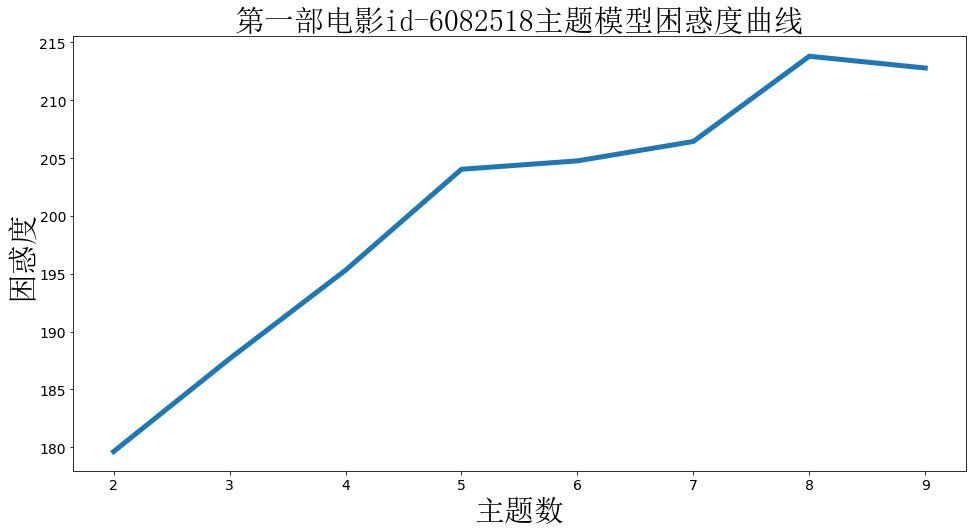

In [27]:
import matplotlib.pyplot as plt
import matplotlib as mpl

params={
    'axes.labelsize': '16',       
    'xtick.labelsize':'14',
    'ytick.labelsize':'14',
    'lines.linewidth': 5 ,
    'legend.fontsize': '14',
    'figure.figsize': '16, 8'}
plt.rcParams.update(params)

# 用来正常显示负号
plt.rcParams['axes.unicode_minus']=False

# 指定默认字体 
zh_font = mpl.font_manager.FontProperties(fname=r'./字体/simsun.ttc', size=30)

#绘制困惑度曲线
plt.plot(ress['主题数'], ress['困惑度'])

#添加标题
plt.title('第一部电影id-6082518主题模型困惑度曲线', fontproperties=zh_font)

#添加X与Y轴名字
plt.xlabel('主题数', fontproperties=zh_font)
plt.ylabel('困惑度', fontproperties=zh_font)

plt.show()

# id:24753477第三部电影的主题分析

In [29]:
# 切词建立语料库
words = []

text = df_24753477["CONTENT"].tolist()

for i in range(len(df_24753477["CONTENT"])):
    cut_words = list(jieba.cut(str(text[i]), cut_all = False))
    words.append([cut_word.strip() for cut_word in cut_words if cut_word not in stopwords and len(cut_word.strip()) > 1 and str(cut_word).strip() != 'nan'])

# 构建训练语料
dictionary1 = Dictionary(words)
corpus1 = [dictionary1.doc2bow(word) for word in words]

perplexitys = []

#主题的个数
model_n = list(range(2, 10))

#每个主题需要显示的词的个数
n_words = 20
perplexitys = []
for n in model_n:
    #新建文件夹存储结果数据
    try:
        os.mkdir('LDA结果3/主题个数为' + str(n) + '/')
    except Exception:
        pass
    
    print('当前确定主题个数为：',n)
    clf = Lda_model(corpus1,n,dictionary1,n_words)
    model,cropus1 = clf.to_result()
    perplexitys.append(np.exp2(-model.log_perplexity(cropus1)))
    
    dfs = pd.DataFrame()
    for now_topics in model.get_document_topics(cropus1):
        column = [n[0] for n in now_topics]
        values = [n[1] for n in now_topics]
        df = pd.DataFrame([values],columns = column)
        dfs = pd.concat([dfs,df])
        
    dfs = dfs.fillna(0)
    dfs['所属主题'] = np.argmax(np.array(dfs),axis = 1)
    
    dfs.index = list(range(len(dfs)))
    data = pd.DataFrame()
    datas = pd.merge(data, dfs, left_index = True,right_index = True)
    datas.to_excel('title_主题个数为' + str(n) + '.xlsx',index = None)
    d = model.print_topics(num_words=n_words)
    
    print(d)
    print('\n')
    ds = [d_[1].split('+') for d_ in d]
    for j in range(len(ds)):
        values = [float(d_.split('*')[0].strip()) for d_ in ds[j]]
        words = [d_.split('*')[1].strip().replace('"','') for d_ in ds[j]]
        dms = pd.DataFrame()
        dms['词'] = words
        dms['权重'] = values
        dms.to_excel('LDA结果3/主题个数为' + str(n) + '/' + '主题' + str(j) + '.xlsx', index = None)
        
ress = pd.DataFrame()
ress['主题数'] = model_n
ress['困惑度'] = perplexitys
ress.to_excel('困惑度情况3.xlsx',index = None)

当前确定主题个数为： 2
-------------模型训练开始-------------
--------------模型训练结束------------
totally cost 0.9463188648223877
[(0, '0.030*"蜘蛛" + 0.025*"可爱" + 0.021*"蜘蛛侠" + 0.018*"喜欢" + 0.012*"漫威" + 0.012*"一个" + 0.010*"钢铁" + 0.010*"就是" + 0.009*"英雄" + 0.009*"这个" + 0.009*"成长" + 0.008*"荷兰" + 0.008*"剧情" + 0.008*"自己" + 0.007*"可以" + 0.006*"呜呜" + 0.005*"反派" + 0.005*"爸爸" + 0.005*"电影" + 0.005*"没有"'), (1, '0.025*"蜘蛛侠" + 0.014*"荷兰" + 0.011*"什么" + 0.008*"电影" + 0.008*"一部" + 0.006*"片子" + 0.006*"没有" + 0.006*"钢铁" + 0.006*"不是" + 0.006*"漫威" + 0.006*"出来" + 0.006*"the" + 0.006*"不错" + 0.006*"英雄" + 0.006*"角色" + 0.005*"喜欢" + 0.005*"一个" + 0.004*"成长" + 0.004*"宇宙" + 0.004*"感觉"')]


当前确定主题个数为： 3
-------------模型训练开始-------------
--------------模型训练结束------------
totally cost 0.8780186176300049
[(0, '0.036*"可爱" + 0.031*"蜘蛛侠" + 0.022*"蜘蛛" + 0.016*"钢铁" + 0.016*"漫威" + 0.014*"荷兰" + 0.010*"喜欢" + 0.008*"英雄" + 0.006*"就是" + 0.006*"超级" + 0.006*"角色" + 0.006*"哈哈哈" + 0.006*"适合" + 0.006*"青春" + 0.006*"一个" + 0.006*"这个" + 0.005*"剧情" + 0.005*"真是" 

当前确定主题个数为： 9
-------------模型训练开始-------------
--------------模型训练结束------------
totally cost 0.8326900005340576
[(0, '0.043*"蜘蛛" + 0.022*"成长" + 0.017*"一个" + 0.013*"就是" + 0.013*"喜欢" + 0.013*"可爱" + 0.013*"妇联" + 0.013*"爸爸" + 0.009*"不错" + 0.009*"黑人" + 0.009*"政治" + 0.009*"无趣" + 0.009*"the" + 0.009*"哈哈哈" + 0.009*"好友" + 0.009*"反派" + 0.009*"real" + 0.009*"可以" + 0.009*"漫威" + 0.009*"小萝卜"'), (1, '0.067*"蜘蛛" + 0.034*"喜欢" + 0.027*"可爱" + 0.021*"电影" + 0.021*"英雄" + 0.014*"蜘蛛侠" + 0.014*"这个" + 0.014*"青春" + 0.014*"最后" + 0.014*"10" + 0.007*"不是" + 0.007*"钢铁" + 0.007*"什么" + 0.007*"三星" + 0.007*"真是" + 0.007*"宇宙" + 0.007*"这部" + 0.007*"反派" + 0.007*"符合" + 0.007*"老巢"'), (2, '0.048*"蜘蛛侠" + 0.024*"喜欢" + 0.024*"钢铁" + 0.017*"可爱" + 0.017*"角色" + 0.017*"就是" + 0.017*"儿子" + 0.009*"还是" + 0.009*"元素" + 0.009*"剧情" + 0.009*"电影" + 0.009*"青春" + 0.009*"打发" + 0.009*"时间" + 0.009*"少年" + 0.009*"爆米花" + 0.009*"出来" + 0.009*"那么" + 0.009*"吸引" + 0.009*"实在"'), (3, '0.032*"荷兰" + 0.017*"可爱" + 0.017*"you" + 0.017*"蜘蛛" + 0.017*"蜘蛛侠" + 0.009*"剧情"

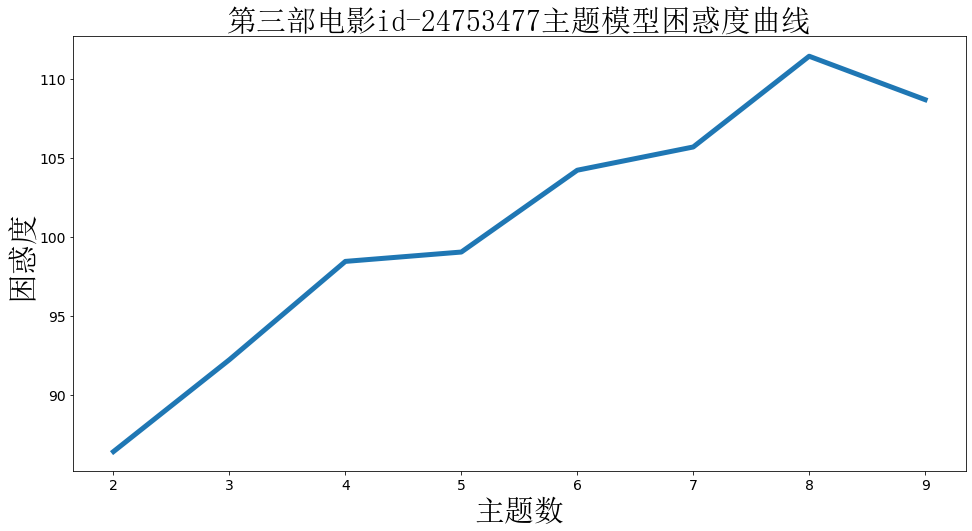

In [30]:
import matplotlib.pyplot as plt
import matplotlib as mpl

params={
    'axes.labelsize': '16',       
    'xtick.labelsize':'14',
    'ytick.labelsize':'14',
    'lines.linewidth': 5 ,
    'legend.fontsize': '14',
    'figure.figsize': '16, 8'}
plt.rcParams.update(params)

# 用来正常显示负号
plt.rcParams['axes.unicode_minus']=False

# 指定默认字体 
zh_font = mpl.font_manager.FontProperties(fname=r'./字体/simsun.ttc', size=30)

#绘制困惑度曲线
plt.plot(ress['主题数'], ress['困惑度'])

#添加标题
plt.title('第三部电影id-24753477主题模型困惑度曲线', fontproperties=zh_font)

#添加X与Y轴名字
plt.xlabel('主题数', fontproperties=zh_font)
plt.ylabel('困惑度', fontproperties=zh_font)

plt.show()

# id:1418189第四部电影的主题分析

In [31]:
# 切词建立语料库
words = []

text = df_1418189["CONTENT"].tolist()

for i in range(len(df_1418189["CONTENT"])):
    cut_words = list(jieba.cut(str(text[i]), cut_all = False))
    words.append([cut_word.strip() for cut_word in cut_words if cut_word not in stopwords and len(cut_word.strip()) > 1 and str(cut_word).strip() != 'nan'])

# 构建训练语料
dictionary1 = Dictionary(words)
corpus1 = [dictionary1.doc2bow(word) for word in words]

perplexitys = []

#主题的个数
model_n = list(range(2, 10))

#每个主题需要显示的词的个数
n_words = 20
perplexitys = []
for n in model_n:
    #新建文件夹存储结果数据
    try:
        os.mkdir('LDA结果4/主题个数为' + str(n) + '/')
    except Exception:
        pass
    
    print('当前确定主题个数为：',n)
    clf = Lda_model(corpus1,n,dictionary1,n_words)
    model,cropus1 = clf.to_result()
    perplexitys.append(np.exp2(-model.log_perplexity(cropus1)))
    
    dfs = pd.DataFrame()
    for now_topics in model.get_document_topics(cropus1):
        column = [n[0] for n in now_topics]
        values = [n[1] for n in now_topics]
        df = pd.DataFrame([values],columns = column)
        dfs = pd.concat([dfs,df])
        
    dfs = dfs.fillna(0)
    dfs['所属主题'] = np.argmax(np.array(dfs),axis = 1)
    
    dfs.index = list(range(len(dfs)))
    data = pd.DataFrame()
    datas = pd.merge(data, dfs, left_index = True,right_index = True)
    datas.to_excel('title_主题个数为' + str(n) + '.xlsx',index = None)
    d = model.print_topics(num_words=n_words)
    
    print(d)
    print('\n')
    ds = [d_[1].split('+') for d_ in d]
    for j in range(len(ds)):
        values = [float(d_.split('*')[0].strip()) for d_ in ds[j]]
        words = [d_.split('*')[1].strip().replace('"','') for d_ in ds[j]]
        dms = pd.DataFrame()
        dms['词'] = words
        dms['权重'] = values
        dms.to_excel('LDA结果4/主题个数为' + str(n) + '/' + '主题' + str(j) + '.xlsx', index = None)
        
ress = pd.DataFrame()
ress['主题数'] = model_n
ress['困惑度'] = perplexitys
ress.to_excel('困惑度情况4.xlsx',index = None)

当前确定主题个数为： 2
-------------模型训练开始-------------
--------------模型训练结束------------
totally cost 0.9026753902435303
[(0, '0.015*"蜘蛛侠" + 0.010*"托比" + 0.010*"剧情" + 0.009*"感觉" + 0.007*"毒液" + 0.007*"选择" + 0.007*"还是" + 0.006*"有点" + 0.006*"但是" + 0.006*"电影" + 0.005*"好看" + 0.005*"女主" + 0.005*"看着" + 0.004*"一部" + 0.004*"小绿" + 0.004*"蜘蛛" + 0.004*"好像" + 0.004*"黑化" + 0.004*"反派" + 0.004*"以及"'), (1, '0.024*"蜘蛛侠" + 0.016*"毒液" + 0.011*"好看" + 0.010*"觉得" + 0.009*"三部曲" + 0.007*"最后" + 0.007*"喜欢" + 0.007*"可以" + 0.007*"自己" + 0.006*"女主" + 0.006*"沙人" + 0.006*"这个" + 0.006*"有些" + 0.006*"黑化" + 0.006*"蜘蛛" + 0.006*"一部" + 0.006*"能力" + 0.005*"托比" + 0.005*"电影" + 0.005*"心态"')]


当前确定主题个数为： 3
-------------模型训练开始-------------
--------------模型训练结束------------
totally cost 0.9500339031219482
[(0, '0.021*"好看" + 0.019*"毒液" + 0.015*"觉得" + 0.012*"蜘蛛侠" + 0.012*"电影" + 0.010*"托比" + 0.010*"这个" + 0.010*"能力" + 0.008*"三部曲" + 0.008*"可以" + 0.008*"还是" + 0.008*"剧情" + 0.008*"心态" + 0.008*"虽然" + 0.008*"时候" + 0.008*"感觉" + 0.008*"自己" + 0.008*"好像" 

当前确定主题个数为： 9
-------------模型训练开始-------------
--------------模型训练结束------------
totally cost 0.7807791233062744
[(0, '0.023*"蜘蛛侠" + 0.018*"还是" + 0.018*"有点" + 0.018*"相当" + 0.012*"黑化" + 0.012*"蜘蛛" + 0.012*"帕克" + 0.012*"身后" + 0.012*"依次" + 0.012*"变坏" + 0.012*"共生体" + 0.012*"剧情" + 0.012*"沙魔" + 0.012*"绿魔" + 0.012*"开心" + 0.006*"好看" + 0.006*"很大" + 0.006*"感觉" + 0.006*"小时候" + 0.006*"基友"'), (1, '0.045*"好看" + 0.032*"一部" + 0.026*"蜘蛛侠" + 0.020*"喜欢" + 0.013*"觉得" + 0.013*"毒液" + 0.013*"三部曲" + 0.013*"寄生虫" + 0.013*"呜呜" + 0.013*"永远" + 0.013*"还是" + 0.013*"哈哈哈哈" + 0.013*"那么" + 0.007*"托比" + 0.007*"开始" + 0.007*"黑色" + 0.007*"这个" + 0.007*"好像" + 0.007*"这么" + 0.007*"时候"'), (2, '0.026*"好看" + 0.017*"一切" + 0.017*"不是" + 0.017*"女主" + 0.017*"蜘蛛侠" + 0.009*"英雄" + 0.009*"托比" + 0.009*"另一面" + 0.009*"真的" + 0.009*"蜘蛛" + 0.009*"永远" + 0.009*"可惜" + 0.009*"奎尔" + 0.009*"牵强" + 0.009*"过于" + 0.009*"spidey" + 0.009*"热爱" + 0.009*"成因" + 0.009*"哈哈哈" + 0.009*"爱情观"'), (3, '0.026*"毒液" + 0.022*"蜘蛛侠" + 0.022*"女主" + 0.018*"这个" + 0.013*"蜘蛛" + 0.0

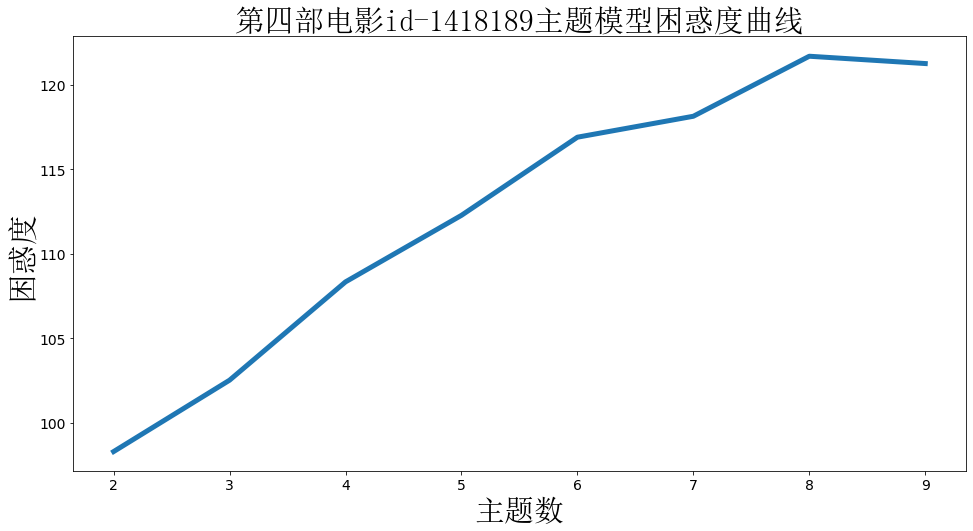

In [32]:
import matplotlib.pyplot as plt
import matplotlib as mpl

params={
    'axes.labelsize': '16',       
    'xtick.labelsize':'14',
    'ytick.labelsize':'14',
    'lines.linewidth': 5 ,
    'legend.fontsize': '14',
    'figure.figsize': '16, 8'}
plt.rcParams.update(params)

# 用来正常显示负号
plt.rcParams['axes.unicode_minus']=False

# 指定默认字体 
zh_font = mpl.font_manager.FontProperties(fname=r'./字体/simsun.ttc', size=30)

#绘制困惑度曲线
plt.plot(ress['主题数'], ress['困惑度'])

#添加标题
plt.title('第四部电影id-1418189主题模型困惑度曲线', fontproperties=zh_font)

#添加X与Y轴名字
plt.xlabel('主题数', fontproperties=zh_font)
plt.ylabel('困惑度', fontproperties=zh_font)

plt.show()